In [92]:
import pandas as pd
import string
import nltk

In [93]:
category_list = []
message_list = []

with open('./data/SMSSpamCollection') as f:
    for line in f:
        row = line.split('\t', maxsplit=1)
        category_list.append(row[0])
        message_list.append(row[1])

dict = {'Category': category_list, 'Message': message_list}
df = pd.DataFrame(data=dict)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...\n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?\n
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [94]:
df['Category'].value_counts()

Category
ham     4827
spam     747
Name: count, dtype: int64

In [95]:
df['Category'].value_counts(normalize=True)

Category
ham     0.865985
spam    0.134015
Name: proportion, dtype: float64

## Text Preprossessing

In [96]:
df_cleaning = df.copy()

In [97]:
df_cleaning['lower_message'] = df_cleaning['Message'].str.lower()
df_cleaning

,Category,Message,lower_message
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...\n,ok lar... joking wif u oni...\n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."
...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?\n,will ü b going to esplanade fr home?\n
5571,ham,"Pity, * was in mood for that. So...any other s...","pity, * was in mood for that. so...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...


In [98]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df_cleaning['message_wo_punct'] = df_cleaning["lower_message"].apply(lambda text: remove_punctuation(text))
df_cleaning

,Category,Message,lower_message,message_wo_punct
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...\n,ok lar... joking wif u oni...\n,ok lar joking wif u oni\n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say\n
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
...,...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?\n,will ü b going to esplanade fr home?\n,will ü b going to esplanade fr home\n
5571,ham,"Pity, * was in mood for that. So...any other s...","pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...
5572,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like id ...


In [99]:
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_cleaning['message_no_stopwords'] = df_cleaning['message_wo_punct'].apply(lambda text: remove_stopwords(text))
df_cleaning

,Category,Message,lower_message,message_wo_punct,message_no_stopwords
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...\n,ok lar... joking wif u oni...\n,ok lar joking wif u oni\n,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say\n,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though
...,...,...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u £750 pound prize ...
5570,ham,Will ü b going to esplanade fr home?\n,will ü b going to esplanade fr home?\n,will ü b going to esplanade fr home\n,ü b going esplanade fr home
5571,ham,"Pity, * was in mood for that. So...any other s...","pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...,pity mood soany suggestions
5572,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like id ...,guy bitching acted like id interested buying s...


In [100]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split(), lang='eng')
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df_cleaning['message_lemmatized'] = df_cleaning['message_no_stopwords'].apply(lambda text: lemmatize_words(text))
df_cleaning

,Category,Message,lower_message,message_wo_punct,message_no_stopwords,message_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...\n,ok lar... joking wif u oni...\n,ok lar joking wif u oni\n,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say\n,u dun say early hor u c already say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though,nah dont think go usf life around though
...,...,...,...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u £750 pound prize ...,2nd time try 2 contact u u £750 pound prize 2 ...
5570,ham,Will ü b going to esplanade fr home?\n,will ü b going to esplanade fr home?\n,will ü b going to esplanade fr home\n,ü b going esplanade fr home,ü b go esplanade fr home
5571,ham,"Pity, * was in mood for that. So...any other s...","pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...,pity mood soany suggestions,pity mood soany suggestion
5572,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like id ...,guy bitching acted like id interested buying s...,guy bitch act like id interested buying someth...


In [101]:
df_cleaning['Category'] = df_cleaning['Category'].replace(['ham', 'spam'], [0, 1])
df_cleaning

/var/folders/4s/pf1zdv_x4_qcflpq4m943q0m0000gn/T/ipykernel_91514/2587618853.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaning['Category'] = df_cleaning['Category'].replace(['ham', 'spam'], [0, 1])


,Category,Message,lower_message,message_wo_punct,message_no_stopwords,message_lemmatized
0,0,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...\n,ok lar... joking wif u oni...\n,ok lar joking wif u oni\n,ok lar joking wif u oni,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say\n,u dun say early hor u c already say,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,nah dont think goes usf lives around though,nah dont think go usf life around though
...,...,...,...,...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u £750 pound prize ...,2nd time try 2 contact u u £750 pound prize 2 ...
5570,0,Will ü b going to esplanade fr home?\n,will ü b going to esplanade fr home?\n,will ü b going to esplanade fr home\n,ü b going esplanade fr home,ü b go esplanade fr home
5571,0,"Pity, * was in mood for that. So...any other s...","pity, * was in mood for that. so...any other s...",pity was in mood for that soany other suggest...,pity mood soany suggestions,pity mood soany suggestion
5572,0,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like id ...,guy bitching acted like id interested buying s...,guy bitch act like id interested buying someth...


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df_cleaning['message_lemmatized'], df_cleaning['Category'], test_size=.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape (number of strings, number of unique words):")
print(X_train_tfidf.shape)
print('List of unique words:')
print(tfidf_vectorizer.get_feature_names_out())
print("Vector Matrix for training data:")
print(X_train_tfidf.toarray())

Shape (number of strings, number of unique words):
(4459, 7497)
List of unique words:
['008704050406' '0089my' '0121' ... 'zyada' 'üll' '〨ud']
Vector Matrix for training data:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [103]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_tfidf, y_train)

y_pred_lr = lr_classifier.predict(X_test_tfidf)

class_report_lr = classification_report(y_test, y_pred_lr)
print("Test Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(class_report_lr)

y_train_pred = lr_classifier.predict(X_train_tfidf)
class_report_train = classification_report(y_train, y_train_pred)
print("Train Data:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print(class_report_train)

Test Data:
Accuracy: 0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       954
           1       0.97      0.76      0.85       161

    accuracy                           0.96      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.96      0.96      0.96      1115

Train Data:
Accuracy: 0.967032967032967
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3873
           1       0.99      0.75      0.86       586

    accuracy                           0.97      4459
   macro avg       0.98      0.88      0.92      4459
weighted avg       0.97      0.97      0.97      4459



Test Data:


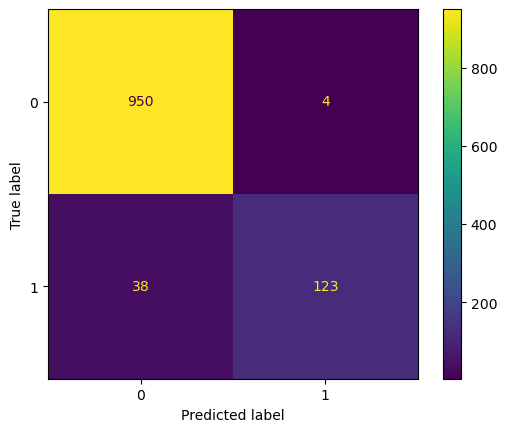

In [104]:
print("Test Data:")
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

Train Data:


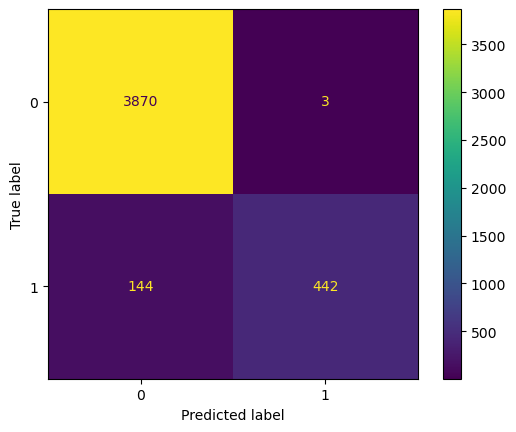

In [105]:
print("Train Data:")
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [106]:
from imblearn.over_sampling import RandomOverSampler

X = df_cleaning[['message_lemmatized']]
y = df_cleaning['Category']

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['label'] = y_resampled

df_balanced['label'].value_counts()
df_balanced.head

<bound method NDFrame.head of                                      message_lemmatized  label
0     go jurong point crazy available bugis n great ...      0
1                               ok lar joking wif u oni      0
2     free entry 2 wkly comp win fa cup final tkts 2...      1
3                   u dun say early hor u c already say      0
4              nah dont think go usf life around though      0
...                                                 ...    ...
9649  07732584351 rodger burn msg try call reply sms...      1
9650  private 2003 account statement 07808247860 sho...      1
9651  dear 0776xxxxxxx uve invite xchat final attemp...      1
9652  44 7732584351 want new nokia 3510i colour phon...      1
9653  ur go 2 bahamas callfreefone 08081560665 speak...      1

[9654 rows x 2 columns]>

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(df_balanced['message_lemmatized'], df_balanced['label'], test_size=.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape (number of strings, number of unique words):")
print(X_train_tfidf.shape)
print('List of unique words:')
print(tfidf_vectorizer.get_feature_names_out())
print("Vector Matrix for training data:")
print(X_train_tfidf.toarray())

Shape (number of strings, number of unique words):
(7723, 7768)
List of unique words:
['008704050406' '0089my' '0121' ... 'zyada' 'üll' '〨ud']
Vector Matrix for training data:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [108]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_tfidf, y_train)

y_pred_lr = lr_classifier.predict(X_test_tfidf)

class_report_lr = classification_report(y_test, y_pred_lr)
print("Test Data:")
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print(class_report_lr)

y_train_pred = lr_classifier.predict(X_train_tfidf)
class_report_train = classification_report(y_train, y_train_pred)
print("Train Data:")
print("Accuracy: ", accuracy_score(y_train, y_train_pred))
print(class_report_train)

Test Data:
Accuracy:  0.9875712066286898
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       994
           1       0.99      0.99      0.99       937

    accuracy                           0.99      1931
   macro avg       0.99      0.99      0.99      1931
weighted avg       0.99      0.99      0.99      1931

Train Data:
Accuracy:  0.9918425482325521
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3833
           1       0.99      0.99      0.99      3890

    accuracy                           0.99      7723
   macro avg       0.99      0.99      0.99      7723
weighted avg       0.99      0.99      0.99      7723



Test Data:


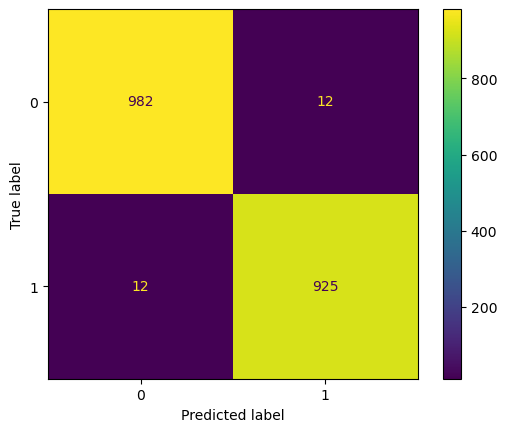

In [109]:
print("Test Data:")
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

Train Data:


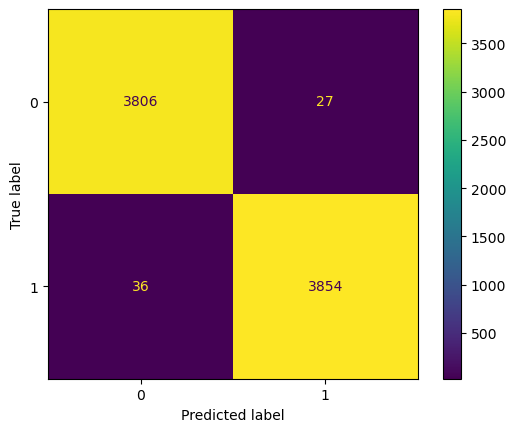

In [110]:
print("Train Data:")
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()